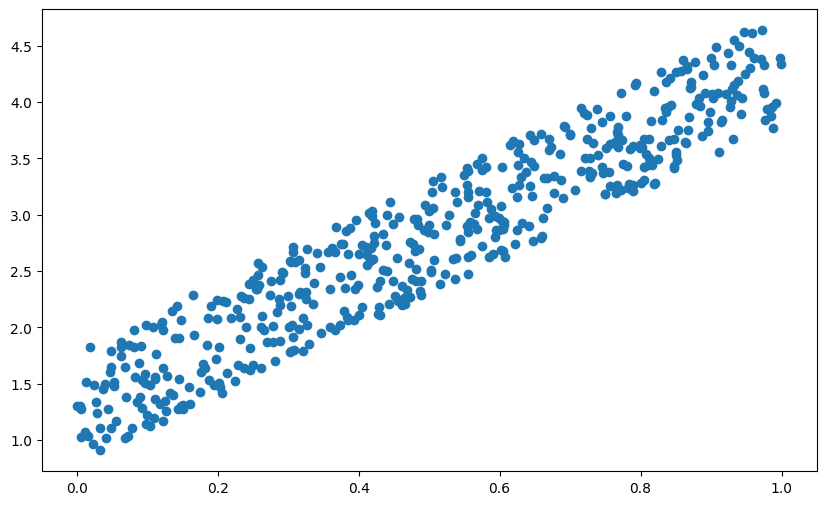

In [6]:
#手写线性回归

import torch
x = torch.rand([500,1])
noise = torch.rand(size=(500,1))
y_true = x*3+0.8+noise

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.scatter(x,y_true)

In [7]:
w = torch.tensor([[0]],dtype=torch.float32,requires_grad=True)
b = torch.tensor(0,dtype=torch.float32,requires_grad=True)
print(w,b)
num_epochs = 1000
lr = 0.05
hist = []
for epoch in range(num_epochs):
    y_pred = torch.mm(x,w)+b
    loss = (y_pred-y_true).pow(2).mean()
    if w.grad is not None:
        w.grad.data.zero_()
    if b.grad is not None:
        b.grad.data.zero_()
    loss.backward()
    hist.append(loss.detach())
    w.data = w.data-lr*w.grad
    b.data = b.data-lr*b.grad
    print(f'epoch: {epoch} loss: {loss}')
print(w.detach())
print(b.detach())

tensor([[0.]], requires_grad=True) tensor(0., requires_grad=True)
epoch: 0 loss: 8.576468467712402
epoch: 1 loss: 6.624933242797852
epoch: 2 loss: 5.135563373565674
epoch: 3 loss: 3.9987382888793945
epoch: 4 loss: 3.1308374404907227
epoch: 5 loss: 2.468078374862671
epoch: 6 loss: 1.961807370185852
epoch: 7 loss: 1.574912190437317
epoch: 8 loss: 1.2790839672088623
epoch: 9 loss: 1.0527292490005493
epoch: 10 loss: 0.8793765902519226
epoch: 11 loss: 0.7464613914489746
epoch: 12 loss: 0.6444001793861389
epoch: 13 loss: 0.5658820271492004
epoch: 14 loss: 0.5053304433822632
epoch: 15 loss: 0.458491712808609
epoch: 16 loss: 0.42212072014808655
epoch: 17 loss: 0.3937426209449768
epoch: 18 loss: 0.37146905064582825
epoch: 19 loss: 0.3538596034049988
epoch: 20 loss: 0.3398156464099884
epoch: 21 loss: 0.32849884033203125
epoch: 22 loss: 0.31926968693733215
epoch: 23 loss: 0.31164032220840454
epoch: 24 loss: 0.30523863434791565
epoch: 25 loss: 0.2997804284095764
epoch: 26 loss: 0.2950490117073059


[[3.0594206]]


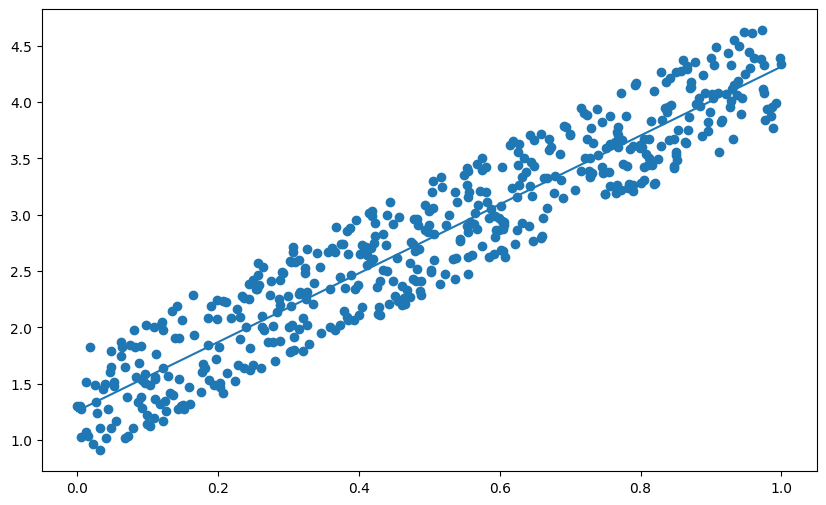

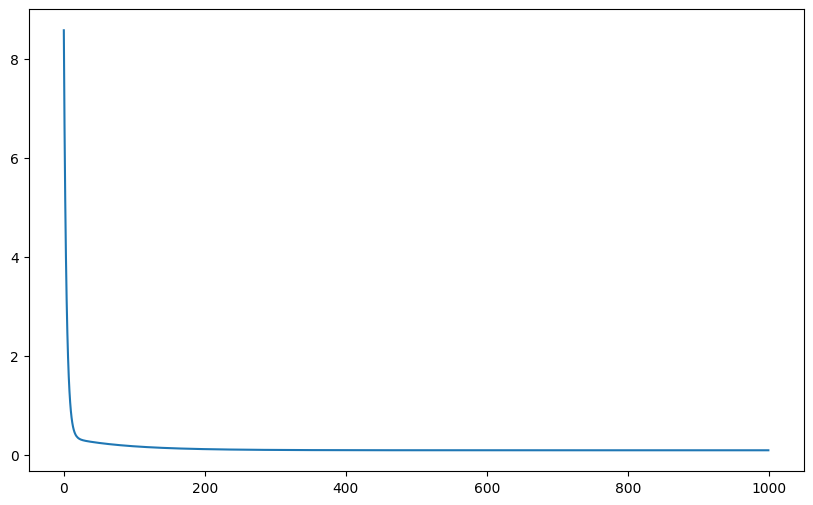

In [8]:
w = w.detach().numpy()
b = b.detach().numpy()
print(w)
w = w[0]
fig = plt.figure(figsize=(10,6))
y1 = w*0+b
y2 = w*1+b
plt.plot([0,1],[y1,y2])
plt.scatter(x,y_true)

fig = plt.figure(figsize=(10,6))
plt.plot(hist)

In [9]:
# nn.Module简化实现线性回归
import torch.nn as nn

epoch: 0 loss: 15.48518180847168
epoch: 1 loss: 11.878053665161133
epoch: 2 loss: 9.126028060913086
epoch: 3 loss: 7.026271343231201
epoch: 4 loss: 5.424060821533203
epoch: 5 loss: 4.201379299163818
epoch: 6 loss: 3.268203020095825
epoch: 7 loss: 2.5558645725250244
epoch: 8 loss: 2.011984348297119
epoch: 9 loss: 1.59660804271698
epoch: 10 loss: 1.2792590856552124
epoch: 11 loss: 1.036690354347229
epoch: 12 loss: 0.8511687517166138
epoch: 13 loss: 0.7091683745384216
epoch: 14 loss: 0.6003711819648743
epoch: 15 loss: 0.5169068574905396
epoch: 16 loss: 0.45277196168899536
epoch: 17 loss: 0.4033871293067932
epoch: 18 loss: 0.3652590811252594
epoch: 19 loss: 0.33572328090667725
epoch: 20 loss: 0.31274691224098206
epoch: 21 loss: 0.29477962851524353
epoch: 22 loss: 0.28063860535621643
epoch: 23 loss: 0.2694215774536133
epoch: 24 loss: 0.2604401707649231
epoch: 25 loss: 0.253169447183609
epoch: 26 loss: 0.2472086101770401
epoch: 27 loss: 0.24225212633609772
epoch: 28 loss: 0.23806680738925934

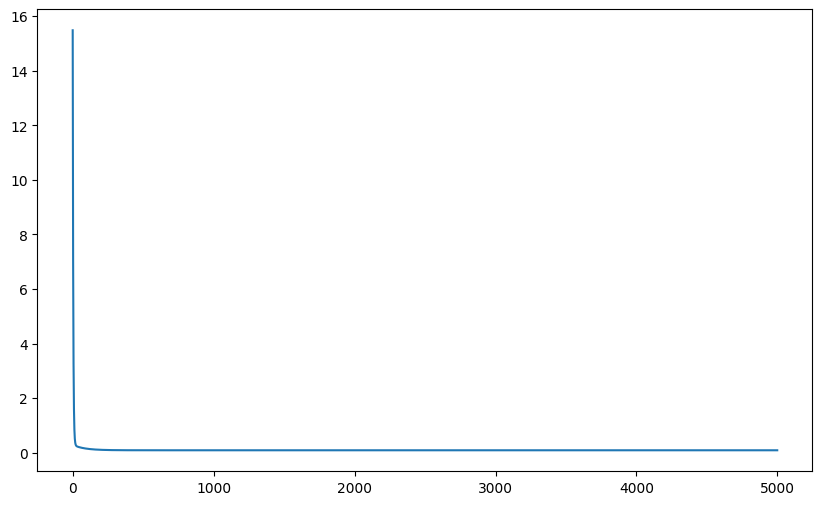

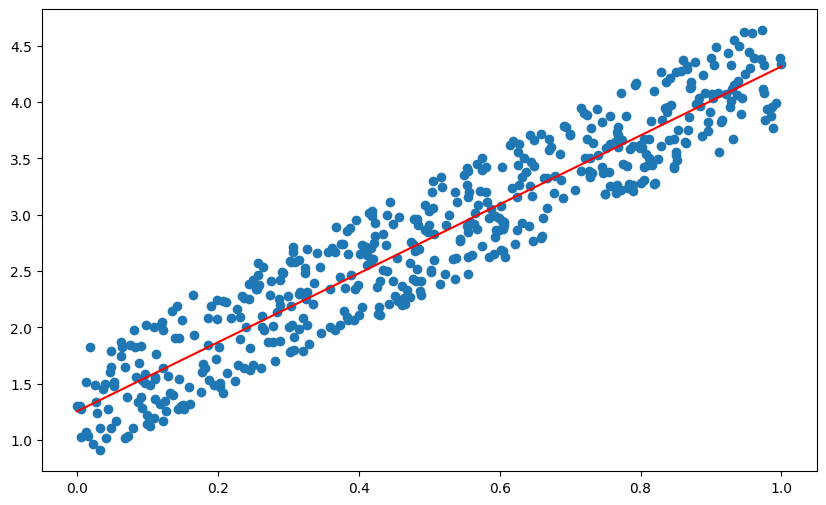

In [10]:

class LR(nn.Module):
    def __init__(self):
        super(LR,self).__init__()
        self.linear = nn.Linear(1,1)
    
    def forward(self,x):
        out = self.linear(x)
        return out
    
module = LR()
loss = nn.MSELoss()
optimiser = torch.optim.SGD(module.parameters(),lr = 0.05)

num_epochs = 5000
hist = []
for epoch in range(num_epochs):
    y_pred = module(x)
    l=loss(y_true,y_pred)
    optimiser.zero_grad()
    l.backward()
    optimiser.step()
    hist.append(l.detach())
    print(f"epoch: {epoch} loss: {l}")
    
fig = plt.figure(figsize=(10,6))
plt.plot(hist)

fig = plt.figure(figsize=(10,6))
y1 = module(torch.tensor([[0]],dtype=torch.float32))
y2 = module(torch.tensor([[1]],dtype=torch.float32))
plt.plot([0,1],[y1.detach(),y2.detach()],'r-')
plt.scatter(x,y_true)